## 안정성 분석 <hr>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [24]:
# df_md = pd.read_excel('./OP_DATA/만도_재무재표_정리본.xlsx')
# df_sl = pd.read_excel('./OP_DATA/SL_재무제표_데이터.xlsx')

# df_md.info()
# df_sl.info()

C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\3553951085.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


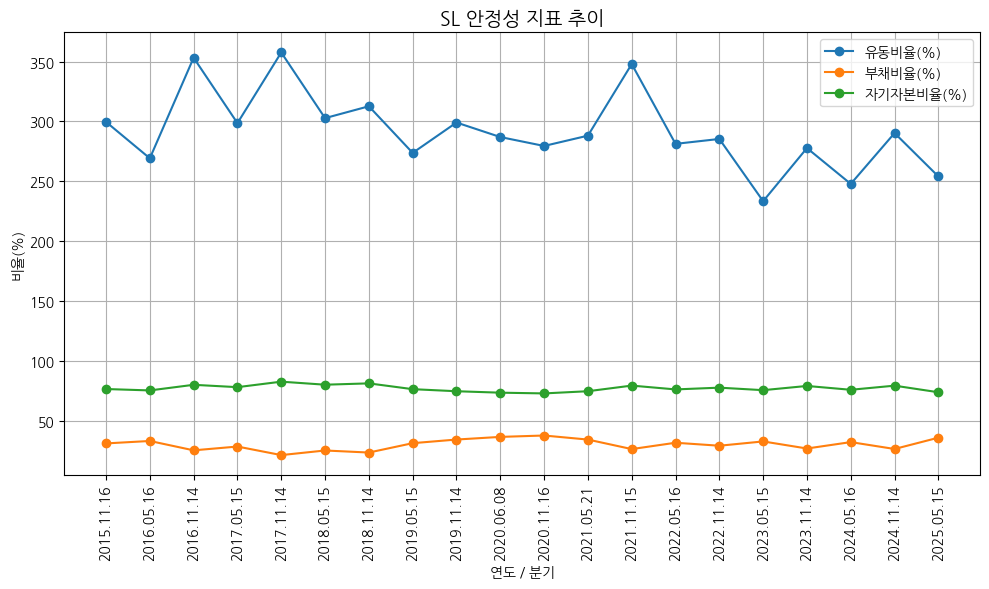


[안정성 지표 요약]


,2015.11.16,2016.05.16,2016.11.14,2017.05.15,2017.11.14,2018.05.15,2018.11.14,2019.05.15,2019.11.14,2020.06.08,2020.11.16,2021.05.21,2021.11.15,2022.05.16,2022.11.14,2023.05.15,2023.11.14,2024.05.16,2024.11.14,2025.05.15
유동비율(%),299.65,269.22,353.29,298.63,357.69,302.81,312.72,273.74,299.13,287.00,279.54,288.16,348.00,281.30,285.40,233.39,277.77,247.83,290.32,254.04
부채비율(%),30.92,32.96,25.14,28.30,21.16,25.01,23.29,31.13,34.16,36.38,37.53,34.14,26.19,31.48,28.99,32.58,26.67,32.01,26.27,35.72
자기자본비율(%),76.38,75.21,79.91,77.94,82.53,79.99,81.11,76.26,74.54,73.33,72.71,74.55,79.25,76.06,77.53,75.43,78.95,75.75,79.19,73.68


In [25]:
# 엑셀 불러오기
file_path = './OP_DATA/SL_재무제표_데이터.xlsx'
df = pd.read_excel(file_path, index_col=0)

# 인덱스 정리 (괄호, 공백 제거)
df.index = (
    df.index.astype(str)
    .str.replace(r"\(.*?\)", "", regex=True)   # (주5,6,7) 같은 주석 제거
    .str.replace(r"\s+", "", regex=True)       # 공백 제거
    .str.strip()
)

# 모든 데이터를 숫자로 변환 (콤마나 문자열 처리)
df = df.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)


# 주요 항목 필터링
targets = [
    "유동자산", "자산총계",
    "유동부채", "부채총계",
    "자본총계"
]
fin = df.loc[df.index.intersection(targets)]



# 결측치 보간
fin = fin.fillna(0)

# 안정성 지표 계산
ratio_df = pd.DataFrame({
    "유동비율(%)": fin.loc["유동자산"] / fin.loc["유동부채"] * 100,
    "부채비율(%)": fin.loc["부채총계"] / fin.loc["자본총계"] * 100,
    "자기자본비율(%)": fin.loc["자본총계"] / fin.loc["자산총계"] * 100
}).T

# 시각화
plt.figure(figsize=(10,6))
for metric in ratio_df.index:
    plt.plot(ratio_df.columns, ratio_df.loc[metric], marker='o', label=metric)

plt.title("SL 안정성 지표 추이", fontsize=14)
plt.xlabel("연도 / 분기")
plt.ylabel("비율(%)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 표 출력
print("\n[안정성 지표 요약]")
display(ratio_df.round(2))


C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2181927911.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


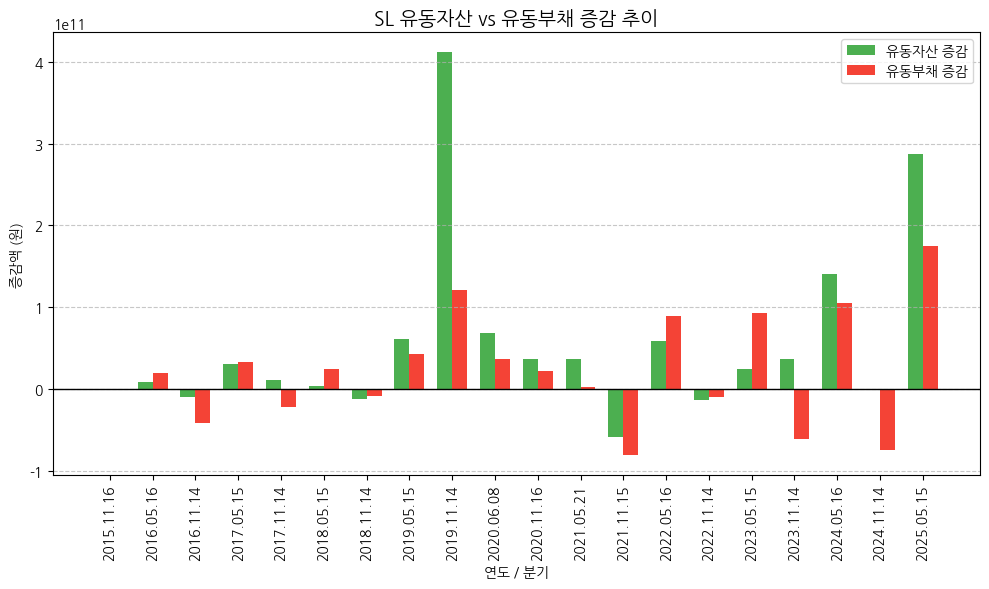

항목
유동부채    4.641275e+11
유동자산    1.113652e+12
dtype: float64
항목
유동부채    2025.05.15
유동자산    2019.11.14
dtype: object
항목
유동부채    2021.11.15
유동자산    2021.11.15
dtype: object


In [ ]:
# 엑셀 불러오기
file_path = './OP_DATA/SL_재무제표_데이터.xlsx'
df = pd.read_excel(file_path, index_col=0)

# 인덱스 정리 (괄호, 공백 제거)
df.index = (
    df.index.astype(str)
      .str.replace(r"\(.*?\)", "", regex=True)
      .str.replace(r"\s+", "", regex=True)
      .str.strip()
)

# 숫자 변환
df = df.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)

# 필요한 항목만 추출
targets = ["유동자산", "유동부채"]
fin = df.loc[df.index.intersection(targets)].fillna(0)

# 증감(전기 대비 변화량) 계산
change = fin.diff(axis=1)   # 각 분기 간 변화량
change = change.fillna(0)

# 시각화
plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(change.columns))

plt.bar(x - bar_width/2, change.loc["유동자산"], width=bar_width, label="유동자산 증감", color="#4CAF50")
plt.bar(x + bar_width/2, change.loc["유동부채"], width=bar_width, label="유동부채 증감", color="#F44336")

plt.axhline(0, color='black', linewidth=1)
plt.title("SL 유동자산 vs 유동부채 증감 추이", fontsize=14)
plt.xlabel("연도 / 분기")
plt.ylabel("증감액 (원)")
plt.xticks(x, change.columns, rotation=90)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


print(change.sum(axis=1))  # 전체 기간 동안의 누적 변화
print(change.idxmax(axis=1))  # 가장 증가한 시점
print(change.idxmin(axis=1))  # 가장 감소한 시점


C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\4223339008.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


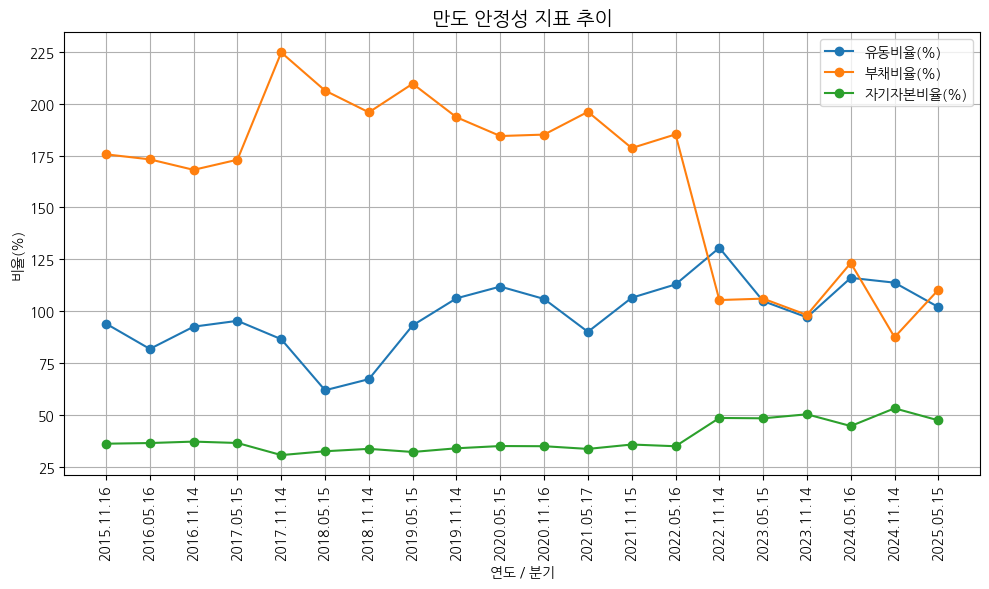


[안정성 지표 요약]
           2015.11.16  2016.05.16  2016.11.14  2017.05.15  2017.11.14  \
유동비율(%)         94.08       81.90       92.62       95.43       86.59   
부채비율(%)        175.57      173.15      168.10      172.98      224.61   
자기자본비율(%)       36.29       36.61       37.30       36.63       30.81   

           2018.05.15  2018.11.14  2019.05.15  2019.11.14  2020.05.15  \
유동비율(%)         62.01       67.36       93.25      106.27      111.92   
부채비율(%)        206.26      195.79      209.56      193.43      184.38   
자기자본비율(%)       32.65       33.81       32.30       34.08       35.16   

           2020.11.16  2021.05.17  2021.11.15  2022.05.16  2022.11.14  \
유동비율(%)        105.96       90.14      106.54      112.96      130.58   
부채비율(%)        185.07      196.04      178.59      185.18      105.44   
자기자본비율(%)       35.08       33.78       35.89       35.07       48.68   

           2023.05.15  2023.11.14  2024.05.16  2024.11.14  2025.05.15  
유동비율(%)        104.92       97.12   

In [27]:
# 엑셀 불러오기
file_path = './OP_DATA/만도_재무상태표_정리.xlsx'
df = pd.read_excel(file_path, index_col=0)

# 인덱스 정리 (괄호, 공백 제거)
df.index = (
    df.index.astype(str)
    .str.replace(r"\(.*?\)", "", regex=True)
    .str.replace(r"\s+", "", regex=True)
    .str.strip()
)

# 모든 데이터를 숫자로 변환
df = df.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)

# 주요 항목만 선택
targets = [
    "유동자산", "자산총계",
    "유동부채", "부채총계",
    "자본총계"
]
fin = df.loc[df.index.intersection(targets)]

# 결측치 보간 -> 없음
# fin = fin.fillna(0)

# 안정성 지표 계산
ratio_df = pd.DataFrame({
    "유동비율(%)": fin.loc["유동자산"] / fin.loc["유동부채"] * 100,
    "부채비율(%)": fin.loc["부채총계"] / fin.loc["자본총계"] * 100,
    "자기자본비율(%)": fin.loc["자본총계"] / fin.loc["자산총계"] * 100
}).T

# 시각화
plt.figure(figsize=(10,6))
for metric in ratio_df.index:
    plt.plot(ratio_df.columns, ratio_df.loc[metric], marker='o', label=metric)

plt.title("만도 안정성 지표 추이", fontsize=14)
plt.xlabel("연도 / 분기")
plt.ylabel("비율(%)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 표 출력
print("\n[안정성 지표 요약]")
print(ratio_df.round(2))


C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\1591354569.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


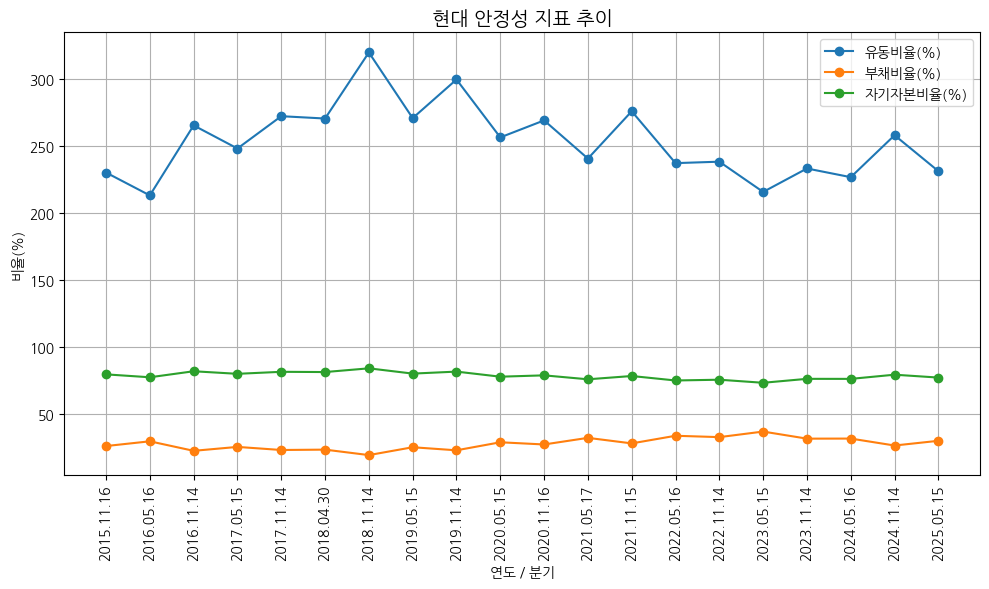


[안정성 지표 요약]
           2015.11.16  2016.05.16  2016.11.14  2017.05.15  2017.11.14  \
유동비율(%)        230.40      213.31      265.67      248.38      272.55   
부채비율(%)         25.85       29.39       22.27       25.21       22.90   
자기자본비율(%)       79.46       77.28       81.78       79.87       81.37   

           2018.04.30  2018.11.14  2019.05.15  2019.11.14  2020.05.15  \
유동비율(%)        270.80      320.21      271.11      299.99      256.69   
부채비율(%)         23.17       19.08       24.95       22.66       28.67   
자기자본비율(%)       81.19       83.97       80.03       81.52       77.72   

           2020.11.16  2021.05.17  2021.11.15  2022.05.16  2022.11.14  \
유동비율(%)        269.41      240.85      276.22      237.45      238.53   
부채비율(%)         27.03       31.98       27.83       33.54       32.52   
자기자본비율(%)       78.72       75.77       78.23       74.89       75.46   

           2023.05.15  2023.11.14  2024.05.16  2024.11.14  2025.05.15  
유동비율(%)        215.91      233.44   

In [28]:
# 엑셀 불러오기
file_path = './OP_DATA/현대_재무재표.xlsx'
df = pd.read_excel(file_path, index_col=0)

# 인덱스 정리 (괄호, 공백 제거)
df.index = (
    df.index.astype(str)
    .str.replace(r"\(.*?\)", "", regex=True)
    .str.replace(r"\s+", "", regex=True)
    .str.strip()
)

# 모든 데이터를 숫자로 변환
df = df.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)

# 주요 항목만 선택
targets = [
    "유동자산", "자산총계",
    "유동부채", "부채총계",
    "자본총계"
]
fin = df.loc[df.index.intersection(targets)]

# 결측치 보간 -> 없음
# fin = fin.fillna(0)

# 안정성 지표 계산
ratio_df = pd.DataFrame({
    "유동비율(%)": fin.loc["유동자산"] / fin.loc["유동부채"] * 100,
    "부채비율(%)": fin.loc["부채총계"] / fin.loc["자본총계"] * 100,
    "자기자본비율(%)": fin.loc["자본총계"] / fin.loc["자산총계"] * 100
}).T

# 시각화
plt.figure(figsize=(10,6))
for metric in ratio_df.index:
    plt.plot(ratio_df.columns, ratio_df.loc[metric], marker='o', label=metric)

plt.title("현대 안정성 지표 추이", fontsize=14)
plt.xlabel("연도 / 분기")
plt.ylabel("비율(%)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 표 출력
print("\n[안정성 지표 요약]")
print(ratio_df.round(2))


C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\246248450.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\246248450.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\246248450.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df3 = df3.applymap(


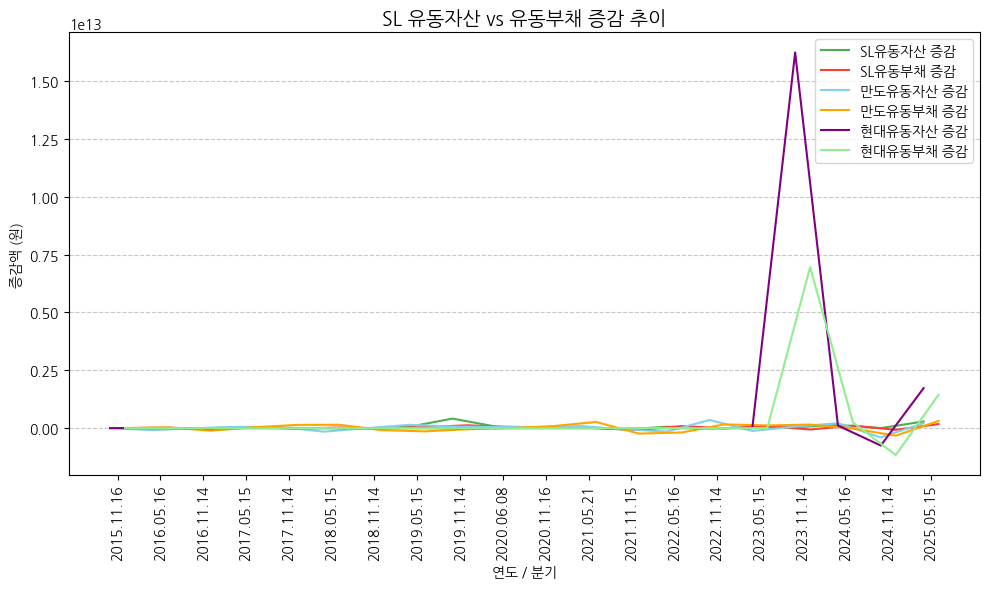

항목
유동부채    4.641275e+11
유동자산    1.113652e+12
dtype: float64
항목
유동부채    2025.05.15
유동자산    2019.11.14
dtype: object
항목
유동부채    2021.11.15
유동자산    2021.11.15
dtype: object


In [ ]:
# 엑셀 불러오기
file_path1 = './OP_DATA/SL_재무제표_데이터.xlsx'
file_path2 = './OP_DATA/만도_재무상태표_정리.xlsx'
file_path3 = './OP_DATA/현대_재무재표.xlsx'
df1 = pd.read_excel(file_path1, index_col=0)
df2 = pd.read_excel(file_path2, index_col=0)
df3 = pd.read_excel(file_path3, index_col=0)

# 인덱스 정리 (괄호, 공백 제거)
df1.index = (
    df1.index.astype(str)
      .str.replace(r"\(.*?\)", "", regex=True)
      .str.replace(r"\s+", "", regex=True)
      .str.strip()
)
df2.index = (
    df2.index.astype(str)
      .str.replace(r"\(.*?\)", "", regex=True)
      .str.replace(r"\s+", "", regex=True)
      .str.strip()
)
df3.index = (
    df3.index.astype(str)
      .str.replace(r"\(.*?\)", "", regex=True)
      .str.replace(r"\s+", "", regex=True)
      .str.strip()
)


# 숫자 변환
df1 = df1.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)

df2 = df2.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)
df3 = df3.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)

# 필요한 항목만 추출
targets = ["유동자산", "유동부채"]
fin1 = df1.loc[df1.index.intersection(targets)].fillna(0)
fin2 = df2.loc[df2.index.intersection(targets)].fillna(0)
fin3 = df3.loc[df3.index.intersection(targets)].fillna(0)

# 증감(전기 대비 변화량) 계산
change1 = fin1.diff(axis=1)   # 각 분기 간 변화량
change2 = fin2.diff(axis=1)   # 각 분기 간 변화량
change3 = fin3.diff(axis=1)   # 각 분기 간 변화량

change1 = change1.fillna(0)
change2 = change2.fillna(0)
change3 = change3.fillna(0)

# 시각화
plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(change1.columns))

plt.plot(x - bar_width/2, change1.loc["유동자산"], label="SL유동자산 증감", color="#4CAF50")
plt.plot(x + bar_width/2, change1.loc["유동부채"],  label="SL유동부채 증감", color="#F44336")
plt.plot(x - bar_width/2, change2.loc["유동자산"], label="만도유동자산 증감", color="skyblue")
plt.plot(x + bar_width/2, change2.loc["유동부채"],  label="만도유동부채 증감", color="orange")
plt.plot(x - bar_width/2, change3.loc["유동자산"],  label="현대유동자산 증감", color="purple")
plt.plot(x + bar_width/2, change3.loc["유동부채"], label="현대유동부채 증감", color="lightgreen")

plt.title("SL 유동자산 vs 유동부채 증감 추이", fontsize=14)
plt.xlabel("연도 / 분기")
plt.ylabel("증감액 (원)")
plt.xticks(x, change1.columns, rotation=90)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


print(change1.sum(axis=1))  # 전체 기간 동안의 누적 변화
print(change1.idxmax(axis=1))  # 가장 증가한 시점
print(change1.idxmin(axis=1))  # 가장 감소한 시점


## 합쳐서 시각화 챗 사용

C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2080072457.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


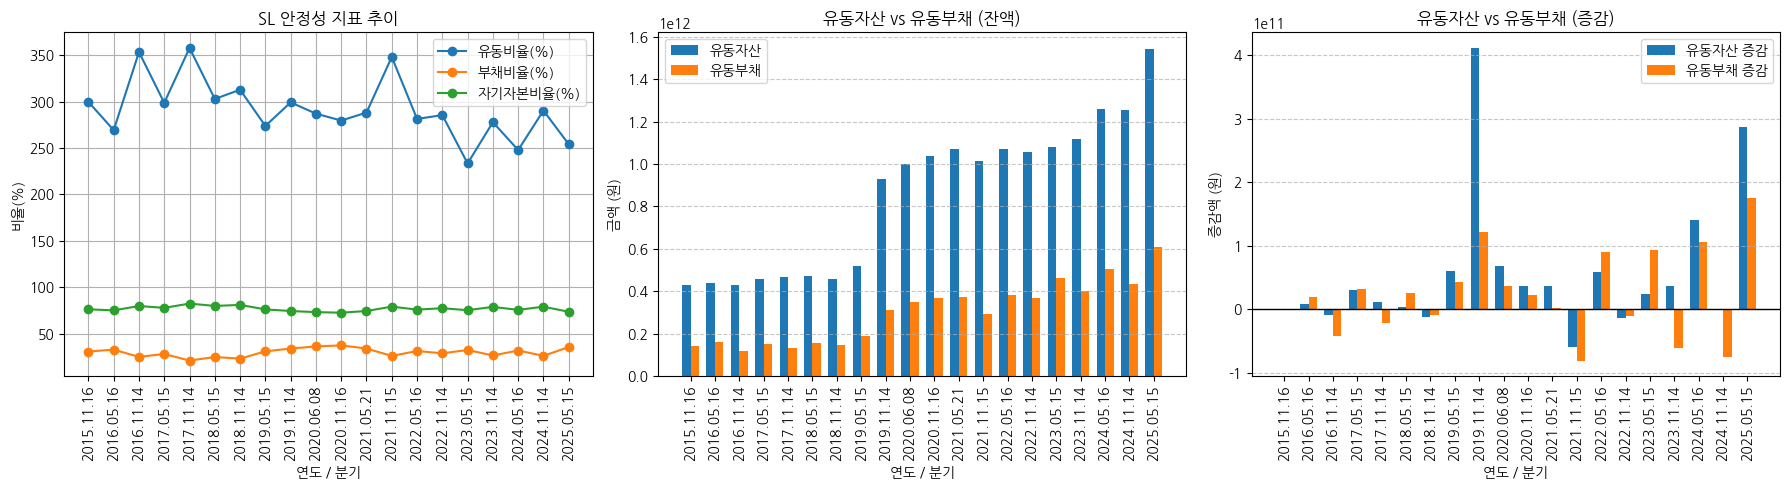

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ 엑셀 불러오기
file_path = './OP_DATA/SL_재무제표_데이터.xlsx'
df = pd.read_excel(file_path, index_col=0)

# 2️⃣ 인덱스 정리 (괄호, 공백 제거)
df.index = (
    df.index.astype(str)
      .str.replace(r"\(.*?\)", "", regex=True)
      .str.replace(r"\s+", "", regex=True)
      .str.strip()
)

# 3️⃣ 모든 데이터를 숫자로 변환
df = df.applymap(
    lambda x: pd.to_numeric(str(x).replace(",", "").strip(), errors="coerce")
)

# 4️⃣ 필요한 항목만 추출
targets = ["유동자산", "자산총계", "유동부채", "부채총계", "자본총계"]
fin = df.loc[df.index.intersection(targets)].fillna(0)

# 5️⃣ 안정성 지표 계산
ratio_df = pd.DataFrame({
    "유동비율(%)":    fin.loc["유동자산"] / fin.loc["유동부채"] * 100,
    "부채비율(%)":    fin.loc["부채총계"] / fin.loc["자본총계"] * 100,
    "자기자본비율(%)": fin.loc["자본총계"] / fin.loc["자산총계"] * 100
}).T

# 6️⃣ 유동자산·유동부채 절대값 & 증감값 준비
levels = fin.loc[["유동자산", "유동부채"]]          # 잔액
change = levels.diff(axis=1).fillna(0)              # 전기 대비 증감

x = np.arange(len(fin.columns))  # 공통 x 위치 (기간 수)
labels = fin.columns             # x축 라벨 (연도/분기)

# 7️⃣ 서브플롯 1x3 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# -----------------------------
# (1) 안정성 지표 추이 (Line)
# -----------------------------
ax = axes[0]
for metric in ratio_df.index:
    ax.plot(ratio_df.columns, ratio_df.loc[metric], marker='o', label=metric)

ax.set_title("SL 안정성 지표 추이")
ax.set_xlabel("연도 / 분기")
ax.set_ylabel("비율(%)")
ax.tick_params(axis='x', rotation=90)
ax.grid(True)
ax.legend()

# -----------------------------
# (2) 유동자산 vs 유동부채 잔액 (Bar)
# -----------------------------
ax = axes[1]
bar_width = 0.35

ax.bar(x - bar_width/2, levels.loc["유동자산"], width=bar_width, label="유동자산")
ax.bar(x + bar_width/2, levels.loc["유동부채"], width=bar_width, label="유동부채")

ax.set_title("유동자산 vs 유동부채 (잔액)")
ax.set_xlabel("연도 / 분기")
ax.set_ylabel("금액 (원)")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# -----------------------------
# (3) 유동자산 vs 유동부채 증감 (Bar)
# -----------------------------
ax = axes[2]

ax.bar(x - bar_width/2, change.loc["유동자산"], width=bar_width, label="유동자산 증감")
ax.bar(x + bar_width/2, change.loc["유동부채"], width=bar_width, label="유동부채 증감")

ax.axhline(0, color='black', linewidth=1)
ax.set_title("유동자산 vs 유동부채 (증감)")
ax.set_xlabel("연도 / 분기")
ax.set_ylabel("증감액 (원)")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


## 합쳐서 시각화 챗 사용

C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2225195291.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(str(x).replace(",","").strip(), errors="coerce"))
C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2225195291.py:59: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(level=0, axis=1).last()
C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2225195291.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(str(x).replace(",","").strip(), errors="coerce"))
C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2225195291.py:59: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(level=0, axis=1).last()
C:\Users\qjadl\AppData\Local\Temp\ipykernel_26628\2225195291.py:73: FutureWarn

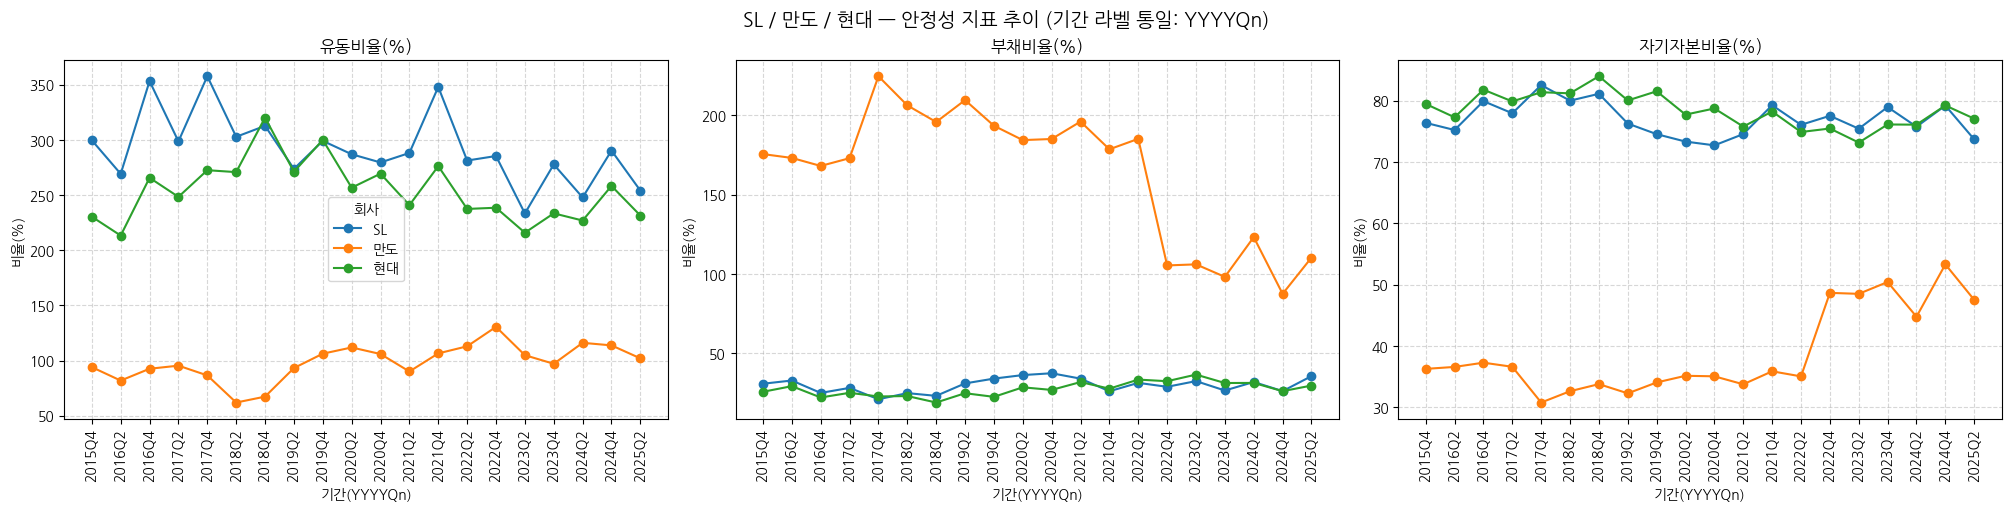

In [38]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------
# 0) 파일 경로
# ---------------------------------------
files = {
    "SL":   "./OP_DATA/SL_재무제표_데이터.xlsx",
    "만도": "./OP_DATA/만도_재무상태표_정리.xlsx",
    "현대": "./OP_DATA/현대_재무재표.xlsx",
}

TARGETS = ["유동자산","자산총계","유동부채","부채총계","자본총계"]

# ---------------------------------------
# A) 기간 라벨 표준화: 모든 열을 YYYYQn으로
# ---------------------------------------
def _q_from_month(m): return (m-1)//3 + 1
def _q_from_kor(text):
    m = re.search(r'([1-4])\s*분기', text)
    return int(m.group(1)) if m else None

def normalize_period_label(col: str):
    s = str(col).strip()
    # 이미 2019Q4 / 2019_Q4
    m = re.match(r'^(\d{4})\s*[_\-]?\s*[Qq]([1-4])$', s)
    if m: return f"{m.group(1)}Q{m.group(2)}"

    # 일반 날짜류 -> 분기
    s2 = re.sub(r'[년월일\.\-/ ]+', '-', s)
    dt = pd.to_datetime(s2, errors='coerce')
    if pd.notna(dt): return f"{dt.year}Q{_q_from_month(dt.month)}"

    # 한국어 라벨: 연도 + n분기
    y = re.search(r'(\d{4})', s)
    q = _q_from_kor(s)
    if y and q: return f"{y.group(1)}Q{q}"

    # YYYY-MM/YY.MM 같은 경우
    m2 = re.search(r'(\d{4})\D+(\d{1,2})\b', s)
    if m2:
        year, mon = int(m2.group(1)), int(m2.group(2))
        if 1 <= mon <= 12: return f"{year}Q{_q_from_month(mon)}"

    # 연도만 있으면 Q4로
    m3 = re.match(r'^(\d{4})$', s)
    if m3: return f"{m3.group(1)}Q4"
    return None

def normalize_columns_to_quarter(df: pd.DataFrame):
    new_cols = [normalize_period_label(c) for c in df.columns]
    df = df.copy()
    df.columns = new_cols
    df = df.loc[:, [c for c in df.columns if c is not None]]
    # 같은 분기 중복은 마지막 값 유지
    df = df.groupby(level=0, axis=1).last()
    # 분기 정렬
    def key(p): y,q = p.split('Q'); return (int(y), int(q))
    return df.reindex(sorted(df.columns, key=key), axis=1)

# ---------------------------------------
# B) 로더 + 지표 계산
# ---------------------------------------
def load_and_ratios(path: str):
    df = pd.read_excel(Path(path), index_col=0)
    df.index = (df.index.astype(str)
                .str.replace(r"\(.*?\)", "", regex=True)
                .str.replace(r"\s+", "", regex=True)
                .str.strip())
    df = df.applymap(lambda x: pd.to_numeric(str(x).replace(",","").strip(), errors="coerce"))
    df = normalize_columns_to_quarter(df)
    fin = df.loc[df.index.intersection(TARGETS)].ffill(axis=1).bfill(axis=1)
    ratios = pd.DataFrame({
        "유동비율(%)":     fin.loc["유동자산"] / fin.loc["유동부채"] * 100,
        "부채비율(%)":     fin.loc["부채총계"] / fin.loc["자본총계"] * 100,
        "자기자본비율(%)":  fin.loc["자본총계"] / fin.loc["자산총계"] * 100
    }).T
    return ratios

# ---------------------------------------
# C) 세 회사 기간 맞추기
# ---------------------------------------
company_ratios = {name: load_and_ratios(p) for name,p in files.items()}
all_periods = sorted(
    set().union(*[set(df.columns) for df in company_ratios.values()]),
    key=lambda t: (int(t.split('Q')[0]), int(t.split('Q')[1]))
)
for k in company_ratios:
    company_ratios[k] = company_ratios[k].reindex(columns=all_periods)

# ---------------------------------------
# D) 그리기 (지표별 subplot에 회사 3개 라인)
# ---------------------------------------
metrics = ["유동비율(%)","부채비율(%)","자기자본비율(%)"]
fig, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)

for i, metric in enumerate(metrics):
    ax = axes[i]
    for name, r in company_ratios.items():
        ax.plot(all_periods, r.loc[metric], marker='o', label=name)
    ax.set_title(metric)
    ax.set_xlabel("기간(YYYYQn)")
    ax.set_ylabel("비율(%)")
    ax.tick_params(axis='x', rotation=90)
    ax.grid(True, linestyle='--', alpha=0.5)
    if i == 0: ax.legend(title="회사")

plt.suptitle("SL / 만도 / 현대 — 안정성 지표 추이 (기간 라벨 통일: YYYYQn)", fontsize=14)
plt.show()
